In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [129]:
data=pd.read_csv("C:\\Users\\LENOVO\Desktop\\Sagata\\GzHmM9Jpdpfq0fdG\\ACME-HappinessSurvey2020.csv")

In [130]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [131]:
data['Y'].value_counts()

Y
1    69
0    57
Name: count, dtype: int64

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [133]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


Slightly more than half customers are happy customers. 
Looking at the median values (at 50%) X2 and X3 seems to have lower responses relative to the other predictors. 
There does not seem to be a problem with orders being delivered on time but there seems to be a problem with the contents of the order matching customer expectations. 
Looking at the median value for x4, it doesn't seem like people are unhappy with the price.
In summary, most people are having a problem with ordering everything they want and contents of the order misaligned with expectations. 

Class-wise Statistical Analysis

In [134]:
happy = data[data['Y']==1]
happy.describe()

,Y,X1,X2,X3,X4,X5,X6
count,69.00,69.00,69.00,69.00,69.00,69.00,69.00
mean,1.00,4.54,2.51,3.45,3.80,3.88,4.38
std,0.00,0.70,1.11,1.02,0.90,1.06,0.77
min,1.00,3.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,2.00,3.00,4.00,4.00,5.00
75%,1.00,5.00,3.00,4.00,4.00,5.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


In [135]:
unhappy = data[data['Y']==0]
unhappy.describe()

,Y,X1,X2,X3,X4,X5,X6
count,57.00,57.00,57.00,57.00,57.00,57.00,57.00
mean,0.00,4.09,2.56,3.14,3.68,3.37,4.11
std,0.00,0.85,1.13,1.01,0.85,1.19,0.84
min,0.00,1.00,1.00,1.00,2.00,1.00,2.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,3.00
50%,0.00,4.00,3.00,3.00,4.00,4.00,4.00
75%,0.00,5.00,3.00,4.00,4.00,4.00,5.00
max,0.00,5.00,5.00,5.00,5.00,5.00,5.00


The class wise breakdown further suggests that there is a problem with the contents of the order matching customer expectations (X2) and customers are unable to order everything they want. 
The class wise breakdown also suggests that there is no problem with x1,x4,x5,x6 as these factors have recieved high responses. 

Box Plots

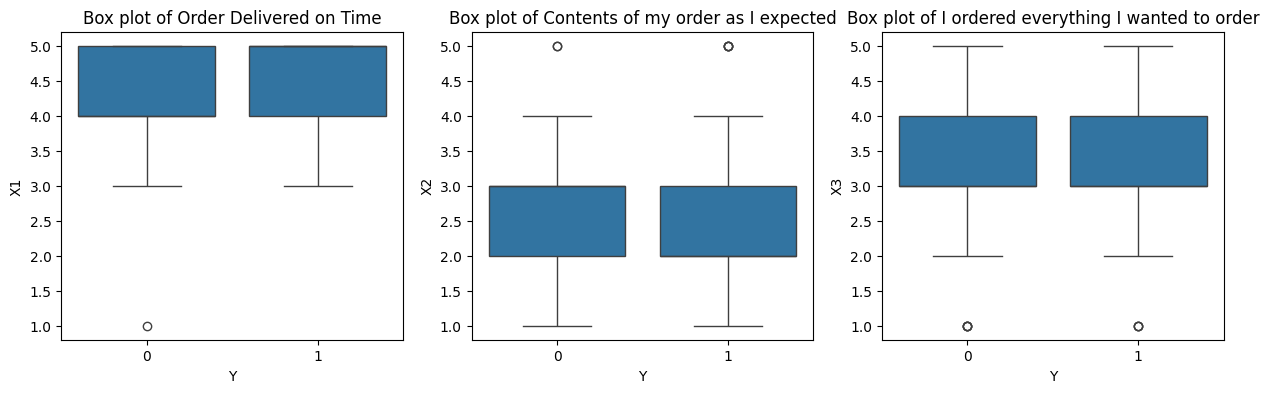

In [136]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='Y',y='X1',data=data)
plt.title('Box plot of Order Delivered on Time')
plt.subplot(1,3,2)
sns.boxplot(x='Y',y='X2',data=data)
plt.title('Box plot of Contents of my order as I expected')
plt.subplot(1,3,3)
sns.boxplot(x='Y',y='X3',data=data)
plt.title('Box plot of I ordered everything I wanted to order')
plt.show()

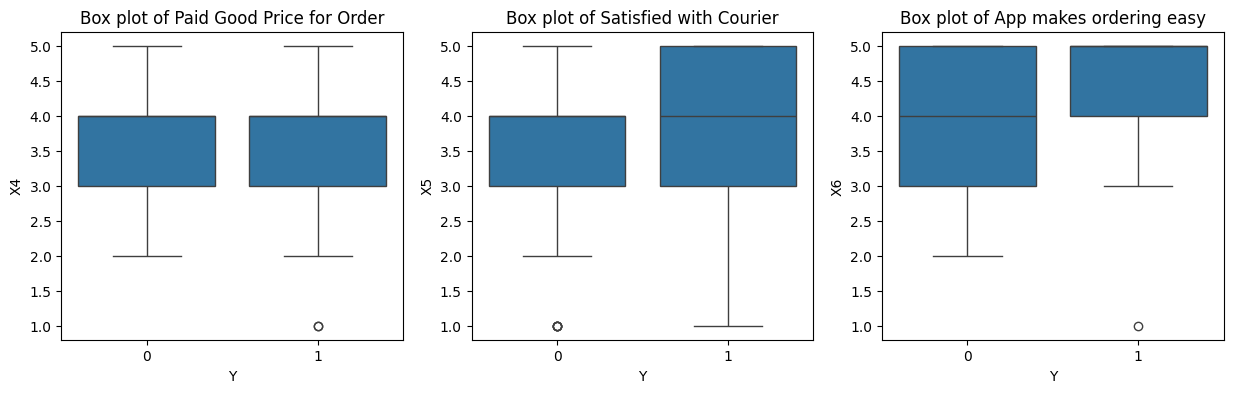

In [137]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='Y',y='X4',data=data)
plt.title('Box plot of Paid Good Price for Order')
plt.subplot(1,3,2)
sns.boxplot(x='Y',y='X5',data=data)
plt.title('Box plot of Satisfied with Courier')
plt.subplot(1,3,3)
sns.boxplot(x='Y',y='X6',data=data)
plt.title('Box plot of App makes ordering easy')
plt.show()

The box plots offer additional insight. It suggests that x5 and x6 maybe good predictors of the outcome. It would just depend if the seperation in the median values or mean values is statistically significant. One could do a t-test to confirm this. However a t-test relies on some assumptions since we don't have information on the experimental design of this data collection doing a t-test may lead to incorrect conclusions. 

Bi-variate Data Analysis

Pair Plot

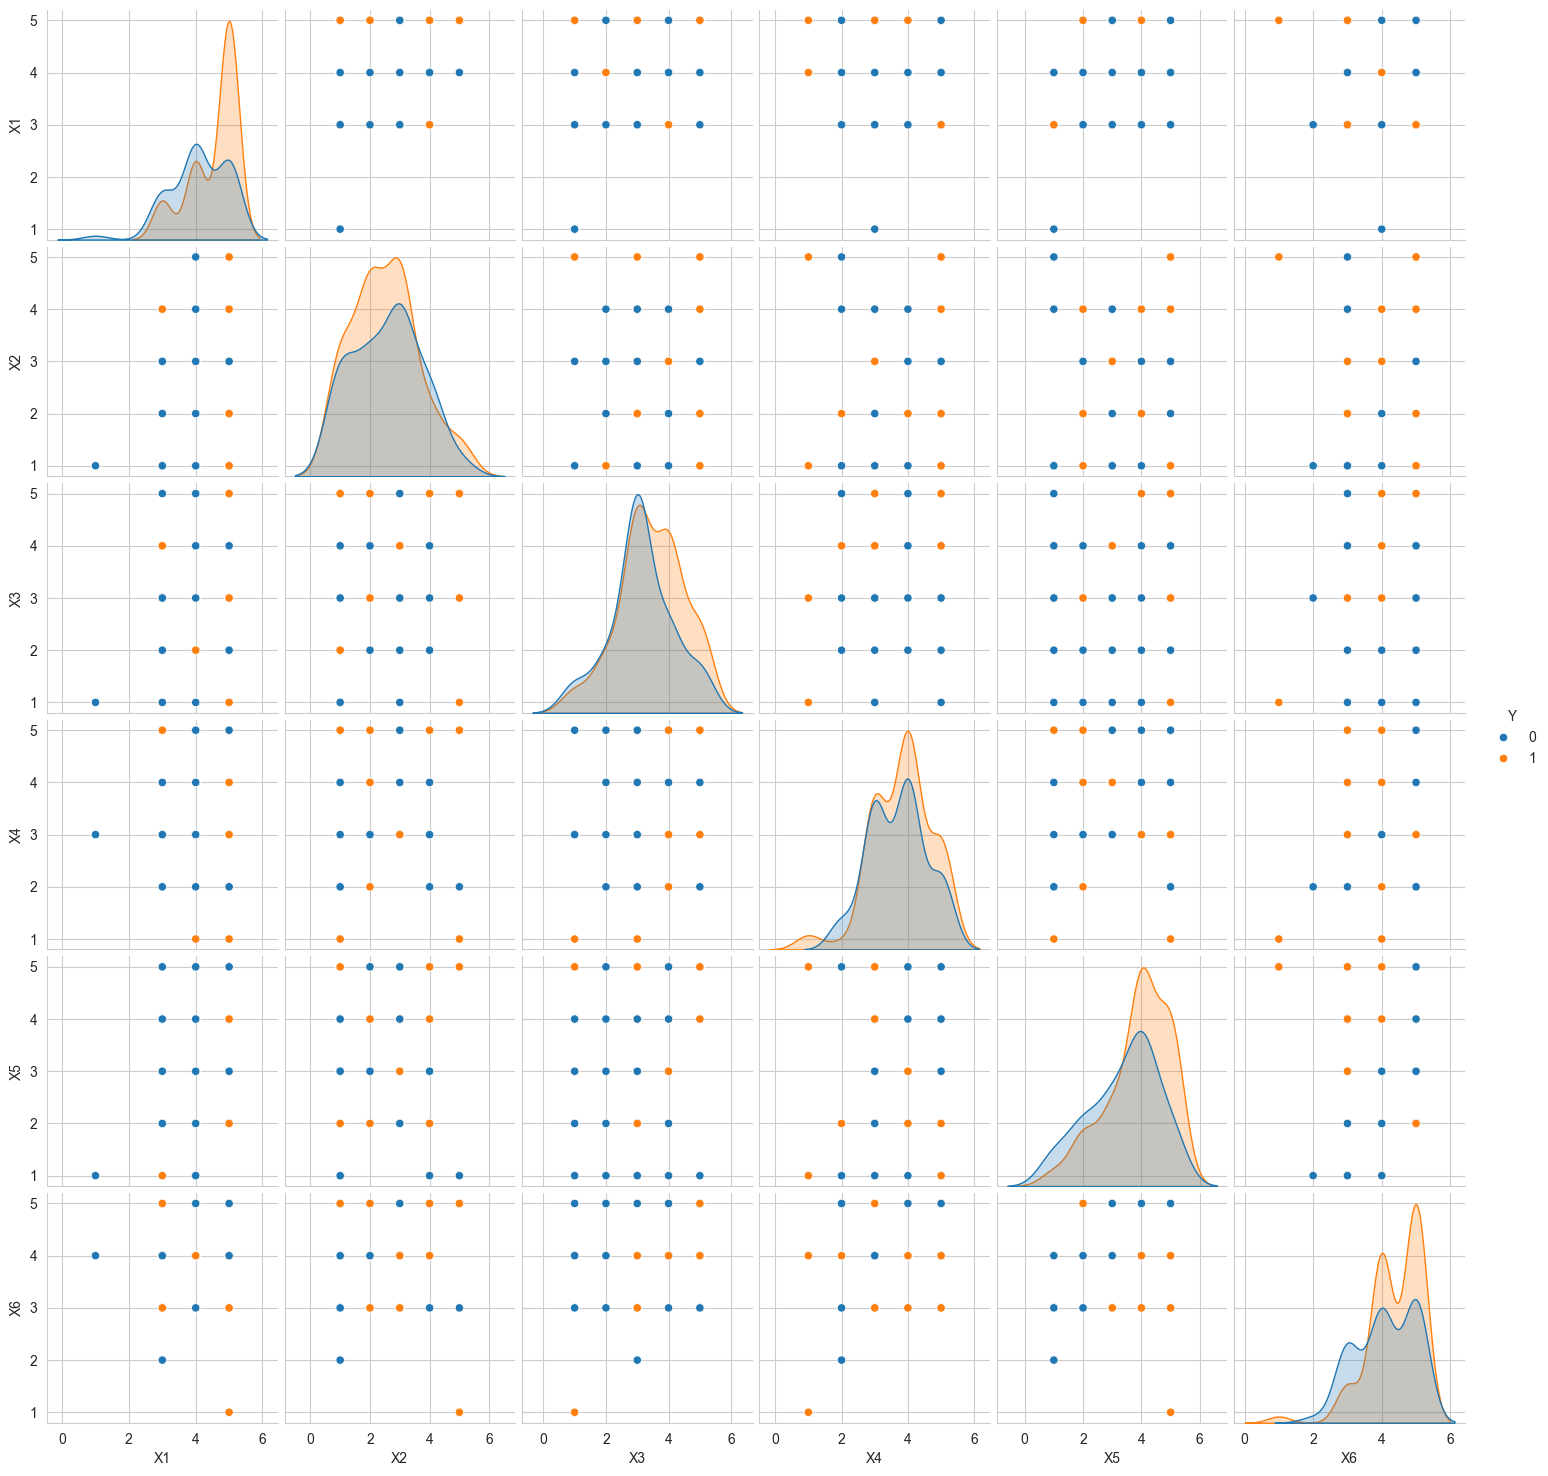

In [138]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='Y')
plt.show()

The scatter plots compare two features at a time. It suggest

1) X6 is an important feature with high influence on the outcome(happy/unhappy customer)
2) No single feature or combination of any two features determines the outcome coherently. 

Other patterns are difficult to discern here.

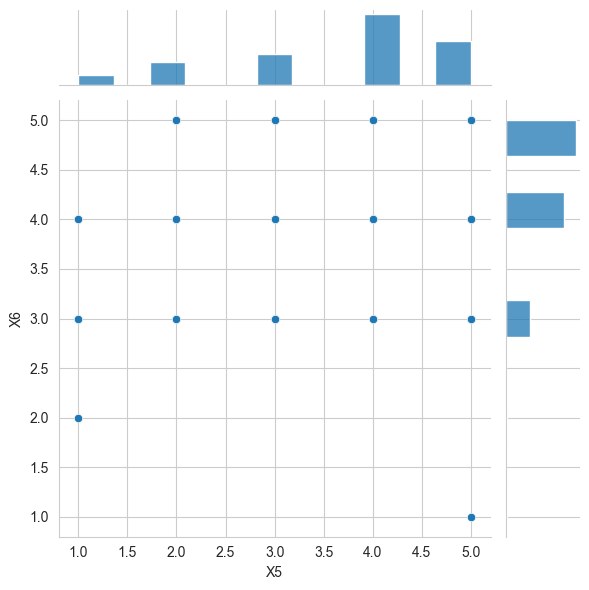

In [158]:
sns.jointplot(x='X5', y='X6', data=data, kind='scatter')
plt.show()

<ol>
    <li> No linear relationship between X5, X6. Possibly no relationship at all linear or otherwise. The answer to either question in the survey has no bearing on the other. </li>
    <li> Both histograms are skewed showing presence of outliers in both X5 and X6. </li>
    <li> The variance of X5 is higher than X6. More varied response to the question if customer is satified with courier, than if the app was easy to use. Generally people gave a high response to X6.</li>
</ol>

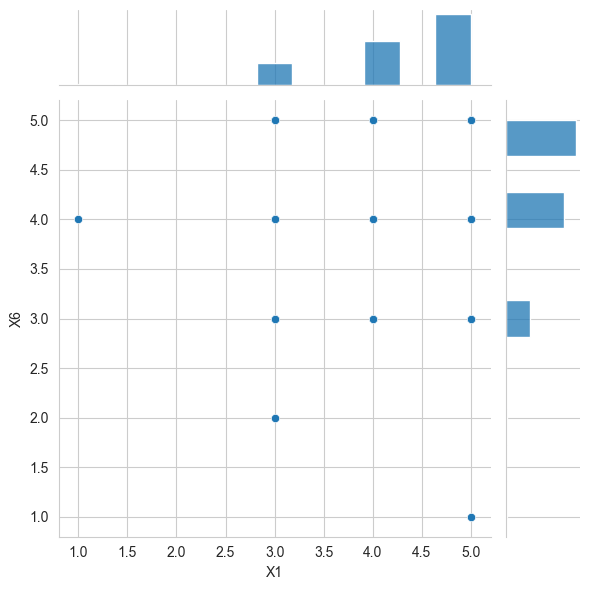

In [159]:
sns.jointplot(x='X1', y='X6', data=data, kind='scatter')
plt.show()

<ol>
    <li> The points are clustered to the top right in a square pattern. Most answers to these questions on the survey are 4 or 5. 3 is outlier response. </li>
    <li> No linear relationship between X1, X6. </li>
    <li> Narrow variance in X1, equal variance to X6</li>
</ol>

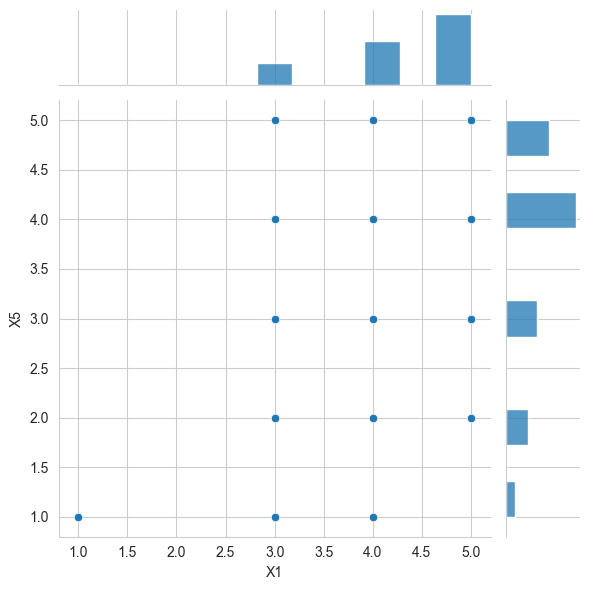

In [160]:
sns.jointplot(x='X1', y='X5', data=data, kind='scatter')
plt.show()

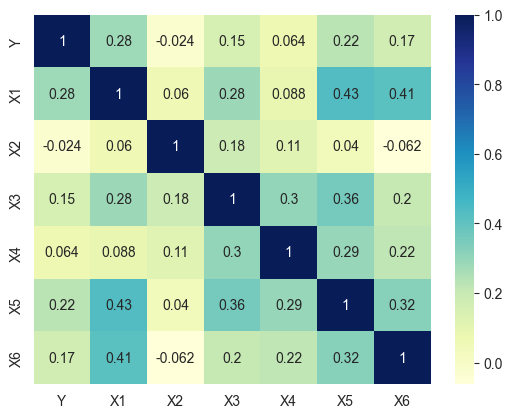

In [140]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

Heat map confirms there is no major coherent relationship or major correlation between variables. Having said the following are the relations that do exist.
<br>
The darkest shades of blue are between X1 vs X5 and X1 vs X6. 
<br>
The next highest correlation is between X3 and X5
<br>
Next in the list is X3 and X4
<br>
Followed by X4 and X5
<br>
Finally X1 and X3.
<br>
While no feature has a major bearing on the outcome, the following is the order of the features having a bearing on the outcome X1>X5>X6>X3.....X4 and X2 have almost 0 bearing on the outcome. 

3D Scatter Plot


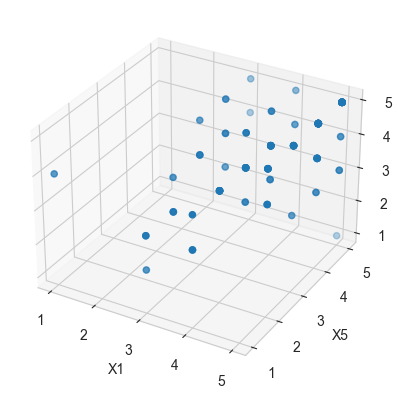

In [161]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['X1'], data['X5'], data['X6'])
ax.set_xlabel('X1')
ax.set_ylabel('X5')
ax.set_zlabel('X6')

plt.show()

There is a relationship here. Generally higher values of the combination of X1,X5,X6 correlate with happy customer. 

The box plots above suggest that all features except for X5 and X6 should be dropped. Below I will evaluate the models with all 6 features and then perform feature selection/pruning. 

<h1> Evaluation using all 6 features <h1>

In [142]:
X = data.drop(['Y'], axis=1)

y = data['Y']

# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



Let's look at the class representation in the test set.
<br>
In the original data there are 126 records, 45% unhappy and 55% happy. 
<br>
If the test set size is 20% of 126, then the test set should have 25 records, train set has 101 records.
 

In [143]:
y_test.describe()

count   26.00
mean     0.50
std      0.51
min      0.00
25%      0.00
50%      0.50
75%      1.00
max      1.00
Name: Y, dtype: float64

In [144]:
# Count the number of 0s
unhappy_test = (y_test == 0).sum()
unhappy_test

np.int64(13)

This means there are 13 unhappy customers and 13 happy customers in the test set. The distribution is 50-50

<h1>Logistic Regression<h1>


In [145]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5769


In [146]:
from sklearn.metrics import classification_report


target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test, target_names=target_names))



              precision    recall  f1-score   support

     class 0       0.75      0.23      0.35        13
     class 1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



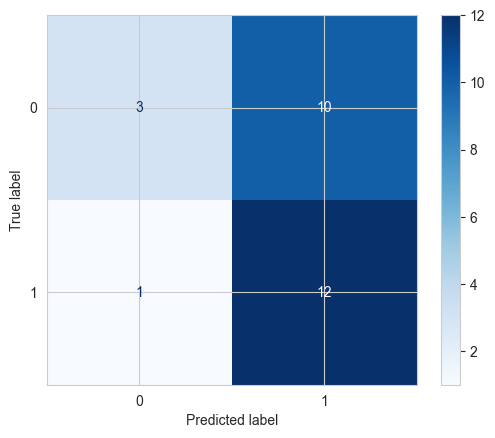

In [147]:
cm = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

True Negatives = 3
<br>
True Positives = 12
<br>
False Positives = 10
<br>
False Negative = 1

The logistic regression model classifies 22 out of 26 customers as happy customers. We know there are 13 happy and 13 unhappy customers.
<br> 
From its 22 classifications of happy customers, 12 customers are correctly classified as happy and 10 unhappy customers are misclassified as happy customers. i.e. Out of 22 classifications of the +ve class 10 are misclassifications.
<br>
From the known 13 happy customers the model correctly classified 12 of them. But it also incorrectly classified 10 unhappy customers as happy customers. 
<br>
The fact that it got 10/22 +ve class classifications wrong could mean that the model is not very good at predicting what makes a customer happy, but it could also mean the problem is with the data and not the model. It could be that in those 10 cases there is no discernable pattern. Would need to dig deeper and see the data to know more.  
<br>
The model classifies 4 records as unhappy where we know the true known cases of unhappy customers is 13. Out of the 4 records which it classifies as unhappy it makes 1 misclassfication, meaning the model identifies 3 out of 13 unhappy customers a.k.a 23% specificity or recall for class 0. 
<br>
Here it is possible that maybe in the remaining 13-4 = 9 cases of unhappy customers there is no discernable pattern. Would need to look more into this to know more...which 13 records are unhappy and which 4 records the model classified as unhappy. 

In [148]:
# Convert Series to DataFrame
y_test_df=y_test.to_frame()
# Convert ndarray to DataFrame
y_pred_df=pd.DataFrame(y_pred_test,columns=['Y_predicted'])

# Reset indices to ensure alignment
X_test = X_test.reset_index(drop=True)
y_test_df = y_test_df.reset_index(drop=True)
y_pred_df = y_pred_df.reset_index(drop=True)

# Concatenate DataFrames
result_df = pd.concat([X_test, y_test_df, y_pred_df], axis=1)
result_df


,X1,X2,X3,X4,X5,X6,Y,Y_predicted
0,4,1,4,4,4,4,0,1
1,5,1,3,3,4,4,1,1
2,4,3,3,4,2,4,0,0
3,4,3,3,3,3,4,1,1
4,5,5,5,2,5,5,0,1
5,3,3,2,4,4,4,0,0
6,4,3,2,4,3,4,1,0
7,5,1,3,4,5,5,1,1
8,5,4,4,4,4,5,1,1
9,4,1,3,3,3,4,0,1


What I am trying to do in the cells below is see if there is anything in the data, any pattern in the features to explain why the model got 12 classifications of happy customers correct and 10 wrong.
<br>
Is it the case that what makes a customer happy is also what makes the customer unhappy?

In [155]:
happy_true_positive = result_df[(result_df['Y']==1)&(result_df['Y_predicted']==1)]
happy_true_positive 

,X1,X2,X3,X4,X5,X6,Y,Y_predicted
1,5,1,3,3,4,4,1,1
3,4,3,3,3,3,4,1,1
7,5,1,3,4,5,5,1,1
8,5,4,4,4,4,5,1,1
12,4,2,3,4,3,3,1,1
13,5,2,5,5,5,3,1,1
14,5,3,3,3,5,5,1,1
15,5,3,3,3,3,5,1,1
16,5,2,2,4,5,5,1,1
19,5,3,4,4,4,5,1,1


In [156]:
happy_false_positive = result_df[(result_df['Y']==0)&(result_df['Y_predicted']==1)]
happy_false_positive 

,X1,X2,X3,X4,X5,X6,Y,Y_predicted
0,4,1,4,4,4,4,0,1
4,5,5,5,2,5,5,0,1
9,4,1,3,3,3,4,0,1
10,3,2,3,3,2,3,0,1
11,4,5,5,5,1,3,0,1
17,4,3,4,4,2,4,0,1
18,4,3,5,5,5,4,0,1
22,3,1,3,2,1,2,0,1
24,5,3,4,5,4,5,0,1
25,5,3,3,3,5,3,0,1


Analyzing the two tables above...there is some room for improvement (some patterns/rules the model is not picking up ex: rows 9,10,11,17,18,22) but there are also some outliers in the dataset that go towards justifying misclassifications (ex: rows 0,4,24).
<br>
<br>
 Perhaps the models should be evaluated after feature pruning and removing outliers from the dataset...that would increase the performance of the models.

Lazy Predict

In [8]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [14]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:02<00:00, 11.55it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [15]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.73               0.73     0.73      0.71   
PassiveAggressiveClassifier        0.69               0.69     0.69      0.69   
NearestCentroid                    0.69               0.69     0.69      0.69   
LGBMClassifier                     0.62               0.62     0.62      0.61   
BernoulliNB                        0.62               0.62     0.62      0.61   
SGDClassifier                      0.62               0.62     0.62      0.62   
GaussianNB                         0.62               0.62     0.62      0.61   
LogisticRegression                 0.62               0.62     0.62      0.59   
LinearDiscriminantAnalysis         0.58               0.58     0.58      0.54   
XGBClassifier                      0.58               0.58     0.58      0.57   
RidgeClassifierCV           

From the report above Perceptron has the highest accuracy, we just don't know yet which model parameters lazy predict used to get 73%, this could be known using hyper OPT (HyperOPT was tried and found to be a waste of time, i don't know what parameters lazy predict uses to achieve 73% accuracy but I am not able to reproduce that).
Therefore next I will be training and evaluating the Perceptron model.


In [97]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000,tol=1e-13,random_state=42)

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.46
              precision    recall  f1-score   support

     class 0       0.48      0.77      0.59        13
     class 1       0.40      0.15      0.22        13

    accuracy                           0.46        26
   macro avg       0.44      0.46      0.41        26
weighted avg       0.44      0.46      0.41        26



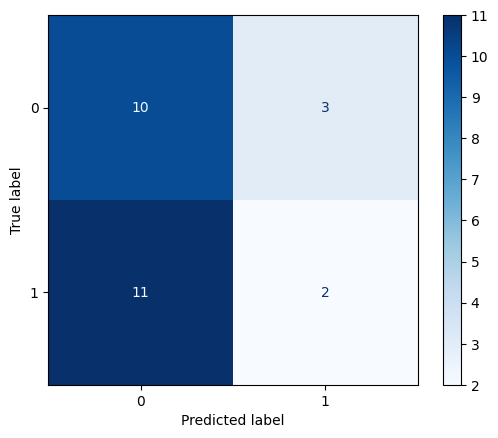

In [98]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

True Negatives = 10
<br>
True Positives = 2=13
<br>
False Positives = 3
<br>
False Negatives = 11


The Perceptron model classifies 21 customers as unhappy and 5 customers as happy. We know there are 13 of each class.
<br>
From the 21 customers that the model classifies as unhappy, 11 are misclassifications i.e happy customers wrongly classified by the model as unhappy. This explains the 48% precision, meaning it correctly predicts the -ve class only half the time.
<br>
Perceptron model is able to correctly identify 10 out of 13 i.e 77% of unhappy customers. 
<br>
However, it makes a lot of misclassifications for the happy customers. Out of 13 happy customers it identified 11 of them as unhappy. False Negatives are high. 
<br>
Consequently this model has a very low recall for happy customers i.e. poor performance in identifying happy customers. 
<br>
Now let's do same evaluation for PassiveAggressiveClassifier

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
# Initialize the PassiveAggressiveClassifier model
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

# Train the model
pac.fit(X_train, y_train)
# Make predictions
y_pred = pac.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.50
              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67        13
     class 1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



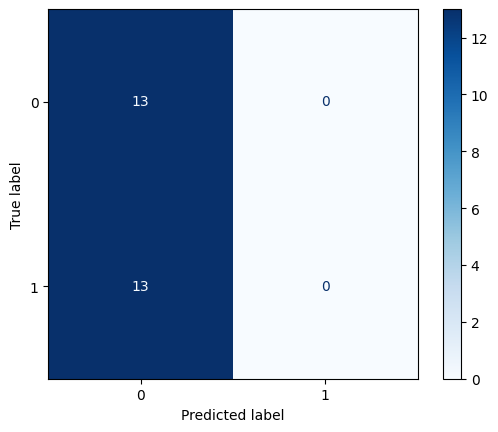

In [20]:
#Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [24]:
print(f'Specificity: {specificity_calculator(13,0)}')

Specificity: 100.0


The PAC model classifies all 26 records as unhappy customers.
<br>
PAC model is able to correctly identify 100% of the cases where the customers were unhappy. 
<br>
However, it misclassifies all the cases of happy customers as unhappy customers. 
<br> 
Therefore, due to high number of False Negatives, this model cannot be used for the usecase of this business because it is not good at predicting happy or unhappy customers. 
<br>
The situation where this model might be useful would be if the purpose of this exercise or this business was to retroactively find the maximum number of unhappy customers after the fact
<br>
i.e. give them a call after they had filled their survey with the intention of reaching all unhappy customers even at the cost of mistakenly reaching out to a happy customer. 
<br>
But if the purpose was to determine which of the 6 aspects of operations (Xs) to focus on to reduce unhappy customers or to simply determine what makes customers happy, then this model is useless for that purpose.



In [162]:
import xgboost as xgb
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees in the ensemble
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of a tree
    subsample=0.8,           # Fraction of samples used per tree
    colsample_bytree=0.8,    # Fraction of features used per tree
    random_state=42,         # Random seed
    use_label_encoder=False  # Disable label encoder deprecation warning
)
#train the model 
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred = xgb_model.predict(X_test)
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



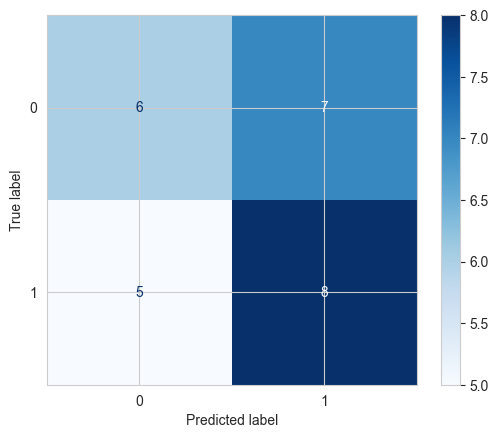

In [163]:
#Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

<h1> Feature Selection/Pruning </h1>
<ol>
    <li>Feature selection using XGBoos</li>
    <li>Feature selection using RFE(recursive feature elimination)</li>
</ol>



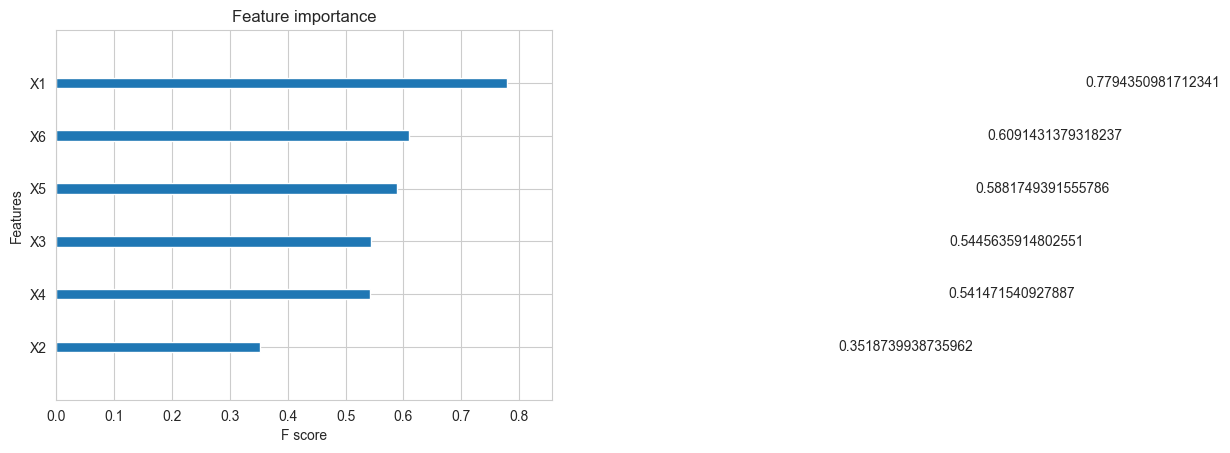

In [171]:
xgb.plot_importance(xgb_model,importance_type='gain')
plt.show()

In [168]:
importances = xgb_model.feature_importances_
feature_names = X.columns  # If X is a DataFrame
feature_importance_dict = dict(zip(feature_names, importances))
# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: X1, Importance: 0.22826124727725983
Feature: X6, Importance: 0.17839044332504272
Feature: X5, Importance: 0.17224980890750885
Feature: X3, Importance: 0.15947802364826202
Feature: X4, Importance: 0.1585724949836731
Feature: X2, Importance: 0.10304795950651169


In [173]:
from sklearn.feature_selection import RFE
# Create RFE with the model and specify the number of features to select
rfe = RFE(estimator=xgb_model)  # Change the number based on your needs

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of features
rankings = rfe.ranking_

# Get the selected features
selected_features = rfe.support_

print("Feature Ranking:", rankings)
print("Selected Features:", selected_features)

# Optional: Print the feature names if using a DataFrame
feature_names = X.columns
selected_feature_names = [name for name, selected in zip(feature_names, selected_features) if selected]
print("Selected Feature Names:", selected_feature_names)




Feature Ranking: [1 4 1 3 2 1]
Selected Features: [ True False  True False False  True]
Selected Feature Names: ['X1', 'X3', 'X6']


Above we have done feature selection using two methods. The second method RFE recommends the 3 optimal features are X1, X3, X6 while the first method gives a general sense of importance of features. 
<br>
Using the above information I form 3 sets of features, we'll run each set on all models and pick the best set. 
<br>
1. {X1,X3,X6} As recommended by RFE
2. {X1,X5,X6} Based on observations from first method
3. {X1,X3,X4,X5,X6} Based on observations from first method

<h1> Experimenting with features {X1,X3,X6} <h1>

In [195]:
X = data.drop(['Y','X2','X4','X5'], axis=1) #selecting X1,X3,X6

y = data['Y']

# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 31/31 [00:02<00:00, 14.46it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

              precision    recall  f1-score   support

     class 0       0.62      0.62      0.62        13
     class 1       0.62      0.62      0.62        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.62        26
weighted avg       0.62      0.62      0.62        26



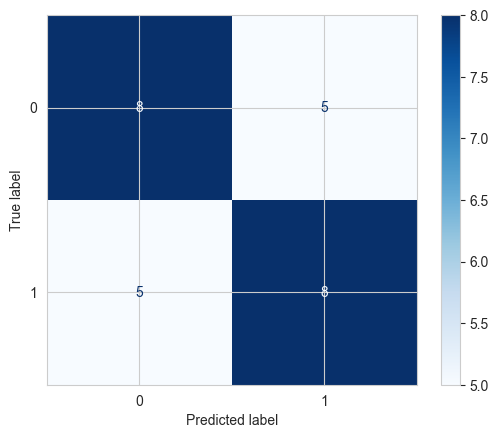

In [181]:
from sklearn.semi_supervised import LabelSpreading
# Initialize LabelSpreading model
label_spreading = LabelSpreading(kernel='rbf', gamma=20, max_iter=30)  # 'gamma' is a parameter for the RBF kernel
# Fit the model with data
label_spreading.fit(X_train, y_train)
# Predict labels
y_pred = label_spreading.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

              precision    recall  f1-score   support

     class 0       0.78      0.54      0.64        13
     class 1       0.65      0.85      0.73        13

    accuracy                           0.69        26
   macro avg       0.71      0.69      0.68        26
weighted avg       0.71      0.69      0.68        26



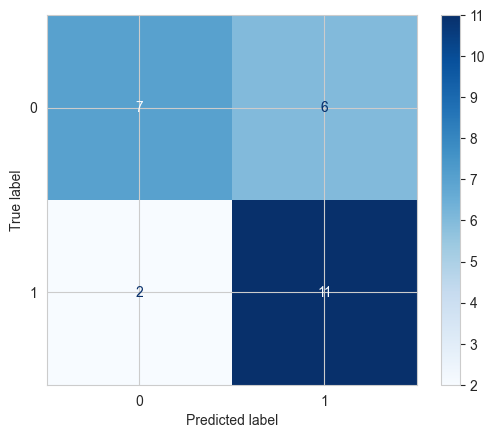

In [183]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_model.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


              precision    recall  f1-score   support

     class 0       0.64      0.54      0.58        13
     class 1       0.60      0.69      0.64        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.62      0.62      0.61        26



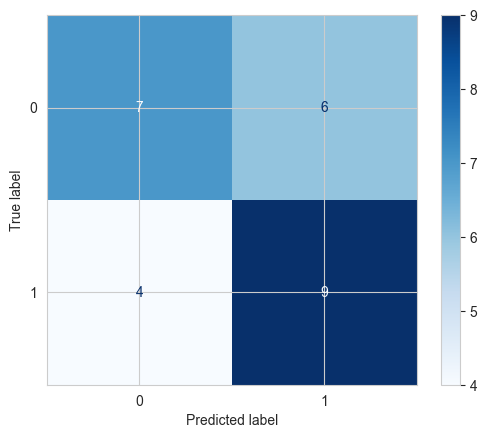

In [190]:
from sklearn.neighbors import NearestCentroid

# Initialize NearestCentroid classifier
nc_model = NearestCentroid(metric='euclidean')

# Train the model
nc_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nc_model.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

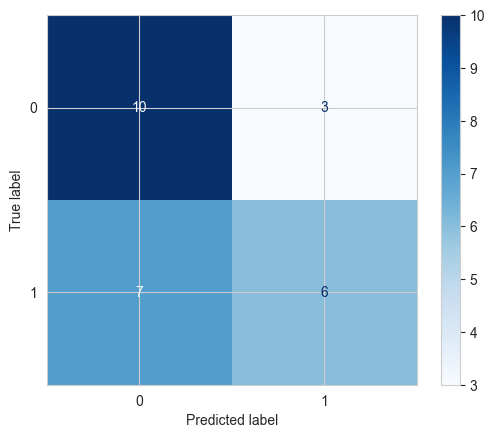

In [196]:
# Initialize LGBMClassifier
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Number of leaves in one tree
    max_depth=-1,          # Maximum tree depth for base learners
    learning_rate=0.1,     # Learning rate
    n_estimators=100,      # Number of boosted trees to fit
    random_state=42
)

# Fit the model with data
# Train the model
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)

#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

<h1> Experimenting with features {X1,X5,X6} <h1>

In [207]:
X = data.drop(['Y','X2','X3','X4'], axis=1) #selecting X1,X5,X6

y = data['Y']

# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 31/31 [00:02<00:00, 15.25it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

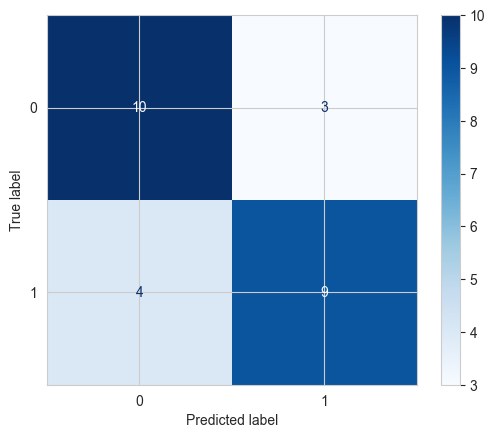

In [194]:
import lightgbm as lgb

# Initialize LGBMClassifier
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Number of leaves in one tree
    max_depth=-1,          # Maximum tree depth for base learners
    learning_rate=0.1,     # Learning rate
    n_estimators=100,      # Number of boosted trees to fit
    random_state=42
)

# Fit the model with data
# Train the model
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)

#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67        13
     class 1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



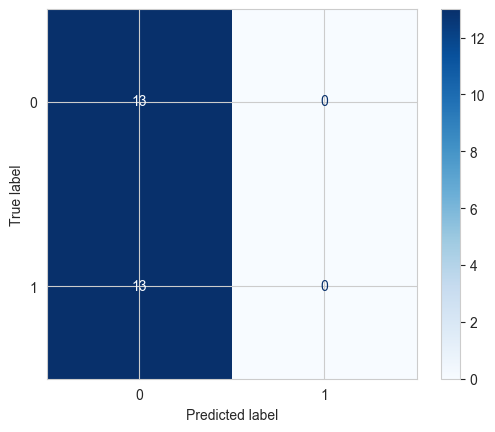

In [198]:
from sklearn.naive_bayes import BernoulliNB
# Initialize the BernoulliNB classifier
bnb_model = BernoulliNB(alpha=1.0, binarize=None)  # `alpha` for smoothing

# Train the model
bnb_model.fit(X_train, y_train)


# Predict on the test set
y_pred = bnb_model.predict(X_test)


#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()



              precision    recall  f1-score   support

     class 0       0.75      0.46      0.57        13
     class 1       0.61      0.85      0.71        13

    accuracy                           0.65        26
   macro avg       0.68      0.65      0.64        26
weighted avg       0.68      0.65      0.64        26



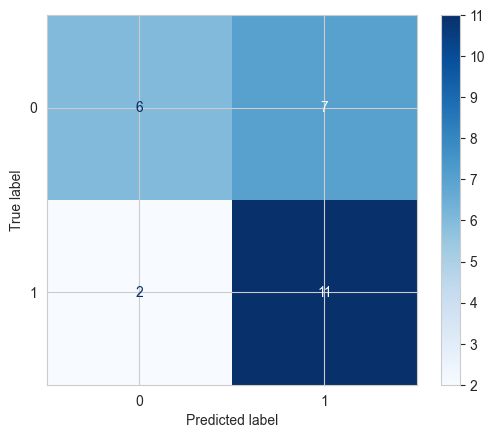

In [187]:
# Initialize LabelSpreading model
label_spreading = LabelSpreading(kernel='rbf', gamma=20, max_iter=30)  # 'gamma' is a parameter for the RBF kernel
# Fit the model with data
label_spreading.fit(X_train, y_train)
# Predict labels
y_pred = label_spreading.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

              precision    recall  f1-score   support

     class 0       0.67      0.31      0.42        13
     class 1       0.55      0.85      0.67        13

    accuracy                           0.58        26
   macro avg       0.61      0.58      0.54        26
weighted avg       0.61      0.58      0.54        26



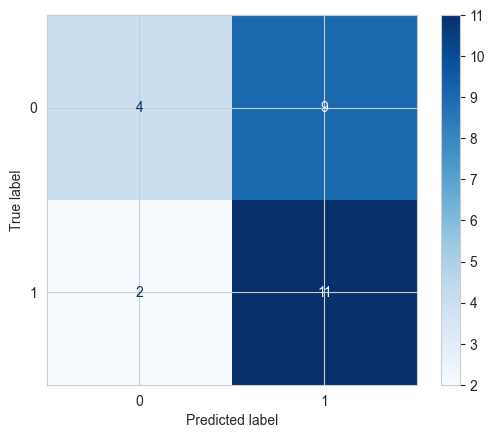

In [188]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_model.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

              precision    recall  f1-score   support

     class 0       0.73      0.62      0.67        13
     class 1       0.67      0.77      0.71        13

    accuracy                           0.69        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.70      0.69      0.69        26



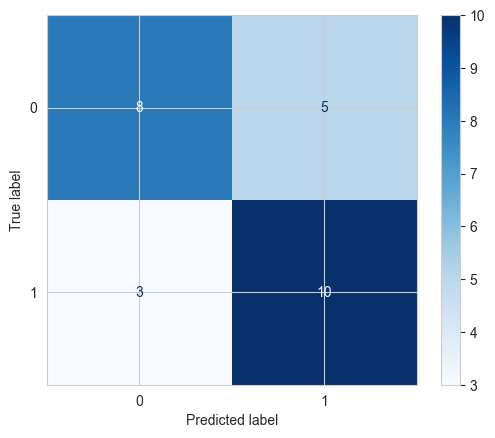

In [192]:
# Initialize NearestCentroid classifier
nc_model = NearestCentroid(metric='euclidean')

# Train the model
nc_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nc_model.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

<h1> Experimenting with features {X1,X3,X4,X5,X6} <h1>

In [204]:
X = data.drop(['Y','X2'], axis=1) #selecting X1,X3,X4,X5,X6

y = data['Y']

# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 31/31 [00:03<00:00,  8.60it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67        13
     class 1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



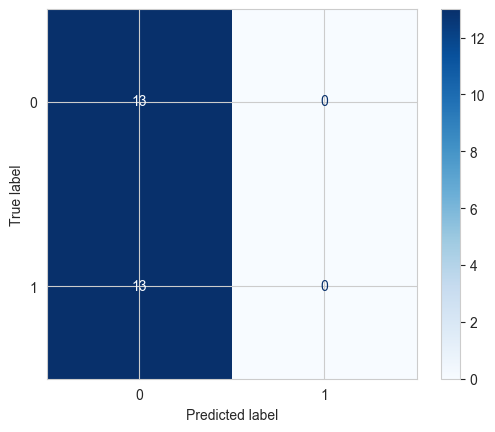

In [205]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, eta0=1.0, random_state=42)

# Train the model
perceptron_model.fit(X_train, y_train)

# Predict on the test set
y_pred = perceptron_model.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


              precision    recall  f1-score   support

     class 0       0.67      0.62      0.64        13
     class 1       0.64      0.69      0.67        13

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



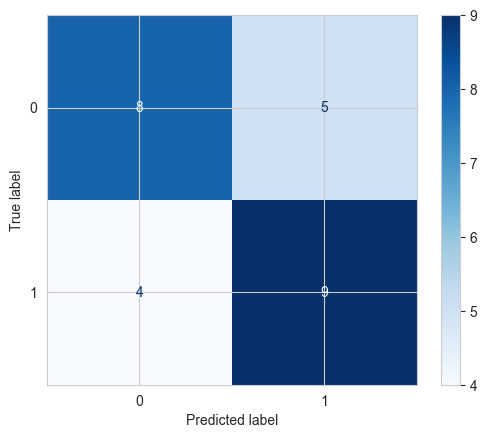

In [202]:
# Initialize NearestCentroid classifier
nc_model = NearestCentroid(metric='euclidean')

# Train the model
nc_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nc_model.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

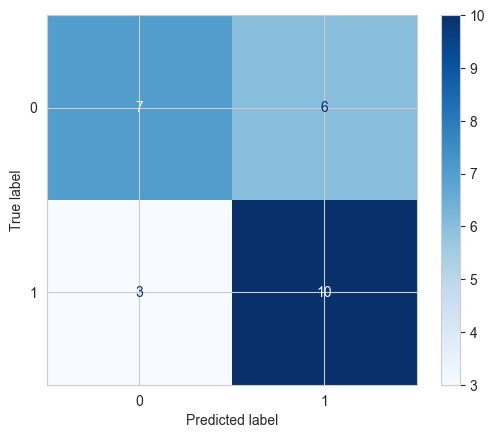

In [203]:
# Initialize LGBMClassifier
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Number of leaves in one tree
    max_depth=-1,          # Maximum tree depth for base learners
    learning_rate=0.1,     # Learning rate
    n_estimators=100,      # Number of boosted trees to fit
    random_state=42
)

# Fit the model with data
# Train the model
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)

#Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

<h1> Findings from above Experiment <h1>

Above we saw the many classification reports (model evaluations) and confusion matrices resulting from evaluating several models using the stated 3 sets of candidate features. 
<br>
Even before we started this activity we know what we are looking for...a confusion matrix that is dark on the top left and bottom right corners (True negative, True Positive) and light in the remaining two quadrants. 
<br>
Below is the <b>best classification report and confusion matrix<b> of the lot, for the given business problem. 

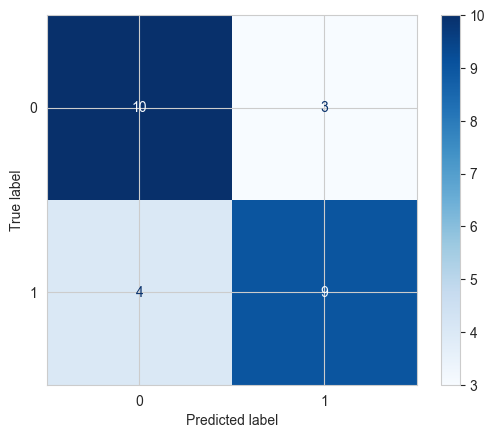

                  precision    recall  f1-score   support

      class 0       0.71      0.77      0.74        13
      class 1       0.75      0.69      0.72        13

          accuracy                           0.73        26
         macro avg       0.73      0.73      0.73        26
      weighted avg       0.73      0.73      0.73        26

The above results were achieved using feature set 2 {X1,X5,X6} and lightgbm classifier. 
<br>
The above model is the best for the compound reason that it makes the highest number of correct classifications across both classes i.e 19/26 correct classifications, while making the fewest misclassfications when compared to any other model, and also yields the highest score for recall for class 0 i.e. this model strikes the best tradeoff. 
<br>
1. Highest true negatives and true positives. 
<br>
The model correctly identifies 10 out of 13 unhappy customers, and it correctly identifies 9 out of 13 unhappy customers
<br>
2. Fewest misclassifications of each class 
<br>
The model makes 14 classifications of unhappy customers with only 4 misclassifications. The model makes 12 classfications for happy customers with only 3 misclassifications. 
<br>
3. It is able to predict what makes a customer unhappy quite well (10/13 unhappy customers identified) while also making 4 misclassfications of unhappy customers. This combination of 10 correctly identified unhappy customers and 4 incorrectly identified unhappy customers (10-4) is the best across all other models and features sets meaning this model and this feature set is our best option at identifying unhappy customers. It gets 10 right and 4 wrong, no other model performs as well. 




<h1> Conclusion for the business <h1>

The purpose of this exercise - predict what makes a customer happy or unhappy - is twofold for the logistics company. 
<br>
First objective is to gain general insight on what determines customer happiness. 
<br>
<br>
For this first answer the analysis above concludes that the following three aspects of operations have the greatest influence on customer happiness:-
<br>
X1 = My order was delivered on time
<br>
X5 = I am satisfied with my courier
<br>
X6 = the app makes ordering easy for me
<br>
<br>
Maybe if you look at each aspect in isolation you will not see much effect but it is the combination of these three that have the highest influence on customer happines i.e. the company needs to get high responses on all 3. 
<br>
<br>
Second objective is -what explains almost 50% unhappy customers? Why are almost half the customers unhappy? What's broken? What needs to be fixed?
<br>
The answer is X5. The business should reduce variation and improve performance in this aspect of operation. 
<br>
The analysis above shows that the features X1, X5, X6 best predict happy/unhappy customers and then we observe from the graphs below that X1 and X6 have narrow variation and mostly high responses 4 or above and few 3s.
<br>
In summary the first answer says that the company needs to get high responses to X1,X5,X6 but we see that X1 and X6 already have high responses so what do I need to fix?
<br>
the graph below shows X5 has a larger variation and more cases of lower/dissatified responses on the question of "am i satisified with my courier". Therefore we know what's broken or where the problem is coming from is X5. 

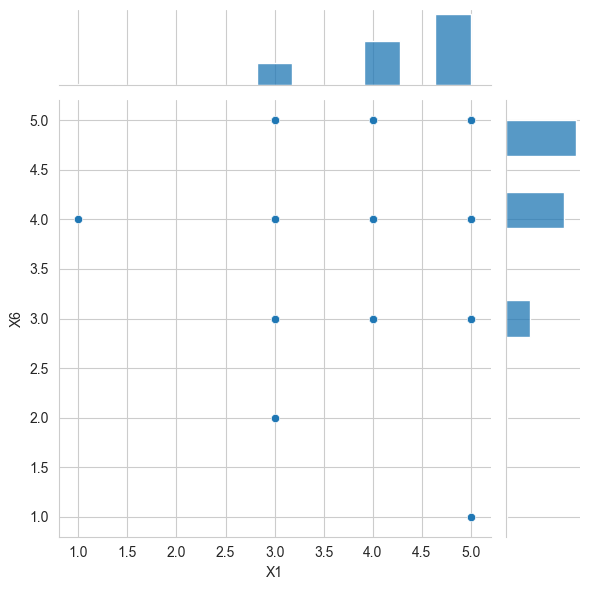

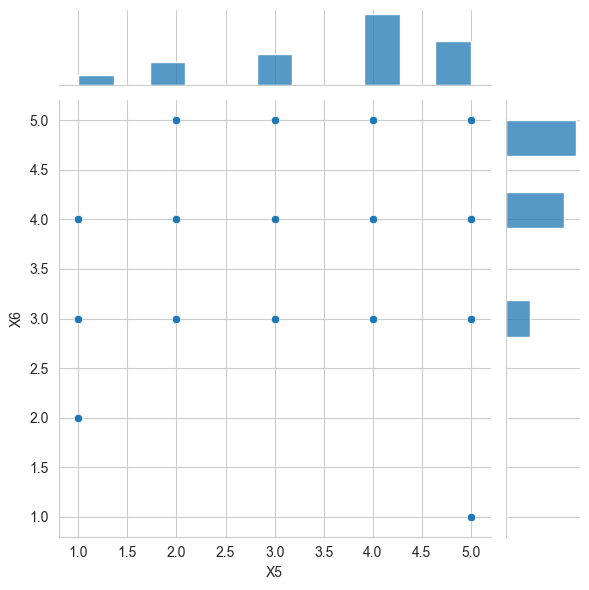